In [57]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# Information About the Parkison's Dataset
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (little '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).

In [124]:
# Here add why you made this project, inspiration, etc.what you hope ot achieve

## Processing Dataset and Checking Null Values

In [16]:
# Loading the data from csv file to a Panda DataFrame
parkinsons_data = pd.read_csv("/Users/jerem/JupyterNotebook/ParkinsonsDiseaseProject/parkinsons.data")
# Printing the first 5 rows of the dataframe
display(parkinsons_data.head())

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


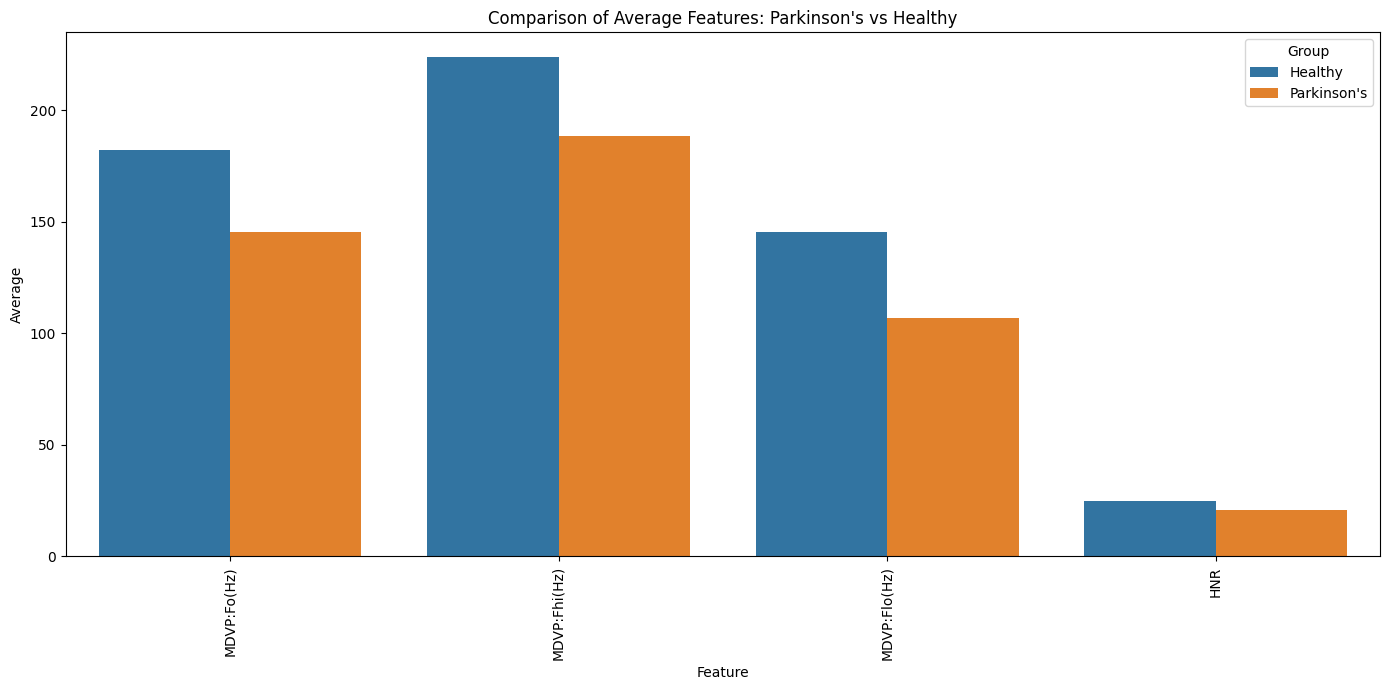

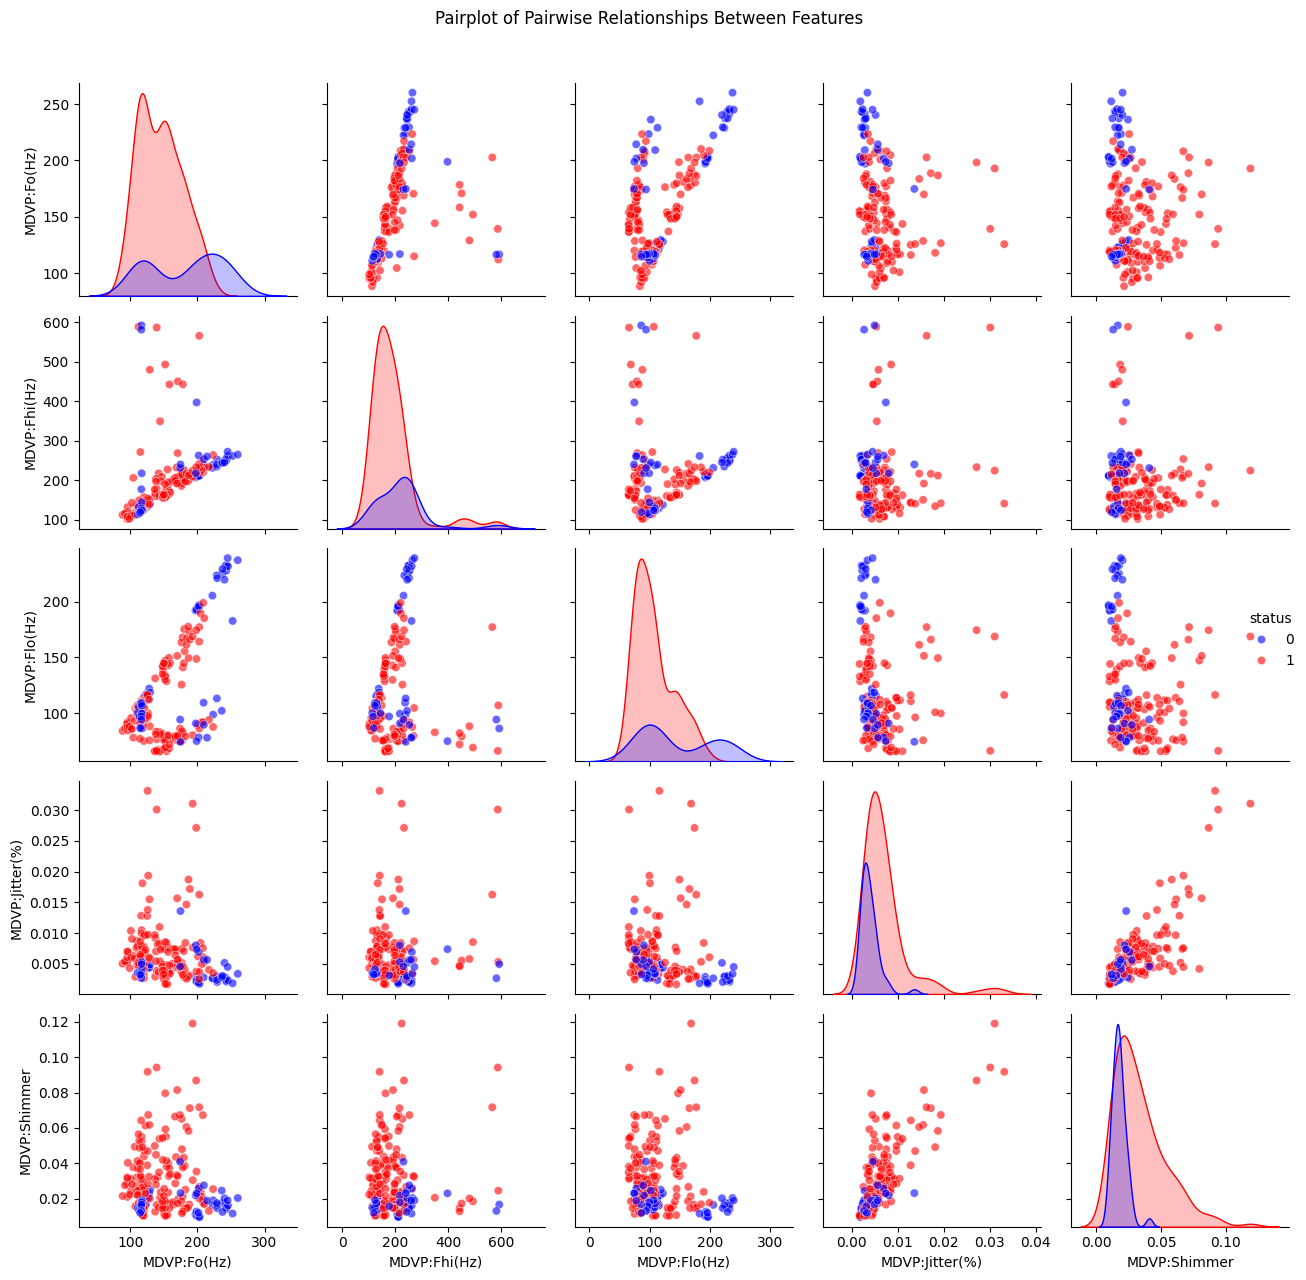

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataframe into Parkinson's (status == 1) and Healthy (status == 0)
parkinsons = parkinsons_data[parkinsons_data['status'] == 1]
healthy = parkinsons_data[parkinsons_data['status'] == 0]

# Specify the columns to keep
selected_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR']

# Calculate the average of each selected column for both groups
parkinsons_avg = parkinsons[selected_columns].mean()
healthy_avg = healthy[selected_columns].mean()

# Create a new DataFrame with the averages for both groups
avg_df = pd.DataFrame({
    'Healthy': healthy_avg,
    'Parkinson\'s': parkinsons_avg
}).reset_index()

# Rename columns for better readability
avg_df.columns = ['Feature', 'Healthy', 'Parkinson\'s']

# Melt the DataFrame to make it suitable for plotting
avg_df_melted = avg_df.melt(id_vars='Feature', value_vars=['Healthy', 'Parkinson\'s'],
                             var_name='Group', value_name='Average')

# Plot a bar graph to compare averages between Parkinson's and Healthy groups
plt.figure(figsize=(14, 7))
sns.barplot(x='Feature', y='Average', hue='Group', data=avg_df_melted)
plt.xticks(rotation=90)
plt.title('Comparison of Average Features: Parkinson\'s vs Healthy')
plt.tight_layout()
plt.show()

# ----- Pairplot for Pairwise Relationships -----
# Grouping related columns together
fundamental_freq_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
# Choose one measure of Jitter (MDVP:Jitter(%))
jitter_columns = ['MDVP:Jitter(%)']
# Choose one measure of Shimmer (MDVP:Shimmer)
shimmer_columns = ['MDVP:Shimmer']

# Select columns for pairplot, excluding RPDE, D2, DFA, spread1, spread2, PPE
selected_columns = fundamental_freq_columns + jitter_columns + shimmer_columns

# Create a new DataFrame with the relevant columns and 'status'
pairplot_df = parkinsons_data[selected_columns + ['status']]

# Plot pairplot, color by 'status' (0 = Healthy, 1 = Parkinson's)
sns.pairplot(pairplot_df, hue='status', palette={0: 'blue', 1: 'red'}, plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Pairwise Relationships Between Features', y=1.02)
plt.tight_layout()
plt.show()

## Observations and Conclusions from Pairplot

### Key Observations:
1. **Distinct Separation Between Groups**:
   - Healthy individuals (blue) show narrower distributions for most features.
   - Parkinson's patients (red) exhibit wider distributions, suggesting greater vocal variability.

2. **Important Features**:
   - MDVP:Fo(Hz) and MDVP:Fhi(Hz):
     - Parkinson's patients show broader ranges in both features, indicating vocal instability.
   - MDVP:Jitter(%):
     - Parkinson’s patients have higher jitter values, indicating greater frequency instability.
   - MDVP:Shimmer:
     - Slightly higher shimmer in Parkinson's patients, but less distinct than jitter or fundamental frequency.

### Conclusions:
- MDVP:Fo(Hz), MDVP:Fhi(Hz), and MDVP:Jitter(%) are the most useful features for distinguishing between Parkinson's and healthy individuals.
- Parkinson’s patients display greater variability in both frequency and amplitude, while healthy individuals show more stable, consistent values.

These observations highlight the vocal instability associated with Parkinson’s, making features like fundamental frequency and jitter key for diagnostic tools in speech analysis.

Determines the number of rows and columns

In [18]:
# Number of rows and columns in the dataframe 
parkinsons_data.shape

(195, 24)

In [47]:
# Check the number of null values in the dataset
# Conclusion: no null data
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [20]:
# Getting statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Target Selection
Displays the concentration of people with Parkinson's Disease. 0 indicates those who are not affected while 1 indicates those who are affected. Moving forward, the database will be grouped based on the target value. 

In [48]:
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [90]:
# Group data based on the target variable for each column
num_cols = parkinsons_data.select_dtypes(include='number').columns
out = parkinsons_data.groupby('status')[num_cols].mean()
out

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.028511,0.011483,24.678750,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.053027,0.029211,20.974048,1.0,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


# Data Preprocessing

## Separating features from target

In [91]:
# Removing the 'name' and 'status' columns which contain no data 
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)

Y = parkinsons_data['status']
parkinsons_data.head()

# Checking to make sure that X includes all data excpet name and status while Y contains only 1s and 0s
# print(X)
# print(Y)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# ML Model
## Seperate the Dataset into Training Sets and Testing Sets

In [92]:
# Split training and testing data into 80% training data and 20% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [93]:
# Dropped 2 columns --> only 22 columns left 
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [94]:
# Standardizing features in a dataset 
scaler = StandardScaler()

In [95]:
# Fit training data into Standard Scaler
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [96]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

## Initial Training of the Model, and evaluating the performance of the model
### Support Vector Machine Model

In [97]:
# Clasify the data into person with Parkison's and person without Parkinson's 
model = svm.SVC(kernel='linear')

In [98]:
# Training the SVM model with training data 
model.fit(X_train, Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Model Evaluation 

Accuracy Score

In [99]:
# Accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [100]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8846153846153846


In [101]:
# Accuracy score on test data
X_test_prediction = model.predict(X_test)
print("balanced-accuracy: {}".format(balanced_accuracy_score(Y_test, X_test_prediction)))
print("accuracy: {}".format(accuracy_score(Y_test, X_test_prediction)))
print("precision: {}".format(precision_score(Y_test, X_test_prediction)))
print("recall: {}".format(recall_score(Y_test, X_test_prediction)))
print("f2: {}".format(fbeta_score(Y_test, X_test_prediction, beta=2)))

balanced-accuracy: 0.780241935483871
accuracy: 0.8717948717948718
precision: 0.90625
recall: 0.9354838709677419
f2: 0.9294871794871795


Not overfitting or underfitting by similar accuracy scores between the training data and test data 

Building a Predictive System

In [102]:
# Taking data from an arbitrary person and using the model to predict whether he/she has Parkinson's Disease
def predictive_system(input_data):
    # Changing input data to a numpy array 
    input_data_as_numpy_array = np.asarray(input_data)
    
    # Reshape the numpy array to tell the model to predict for only one data point value
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    input_data_reshaped = input_data_reshaped.tolist()
    # Standardize the data
    std_data = scaler.transform(input_data_reshaped)
    
    prediction = model.predict(std_data)
    print(prediction)
    
    if prediction[0] == 0:
        print("The person does not have Parkinson's Disease")
    else:
        print("The person has Parkinson's Disease")

In [103]:
# Example 1: testing with a person with Parkinson's Disease name: phon_R01_S01_6 status: 1
# Remove the status from input_data to test the predictive model
import warnings
warnings.filterwarnings("ignore")
input_data = (120.55200,131.16200,113.78700,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.45600,0.02328,0.03526,0.03243,0.06985,0.01222,21.37800,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775)
predictive_system(input_data)

[1]
The person has Parkinson's Disease


In [104]:
# Example 2: testing with a person without Parkinson's Disease name: phon_R01_S07_1 status: 0
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
predictive_system(input_data)

[0]
The person does not have Parkinson's Disease


# Optimization

In [105]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=4) 
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Show difference before and after SMOTE
print(f"Dataset before SMOTE ~ Parkisons: {len(Y_train[Y_train == 1])} Healthy: {len(Y_train[Y_train == 0])}")

print(f"Dataset before SMOTE ~ Parkisons: {len(Y_train_smote[Y_train_smote == 1])} Healthy: {len(Y_train_smote[Y_train_smote == 0])}")

Dataset before SMOTE ~ Parkisons: 116 Healthy: 40
Dataset before SMOTE ~ Parkisons: 116 Healthy: 116


In [106]:
# Retraining
scaler.fit(X_train_smote)
X_train_smote = scaler.transform(X_train_smote)
X_test_smote = scaler.transform(X_test)
model.fit(X_train_smote, Y_train_smote)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [107]:
X_test_prediction = model.predict(X_test_smote)
print("balanced-accuracy: {}".format(balanced_accuracy_score(Y_test, X_test_prediction)))
print("accuracy: {}".format(accuracy_score(Y_test, X_test_prediction)))
print("precision: {}".format(precision_score(Y_test, X_test_prediction)))
print("recall: {}".format(recall_score(Y_test, X_test_prediction)))
print("f2: {}".format(fbeta_score(Y_test, X_test_prediction, beta=2)))

balanced-accuracy: 0.6512096774193548
accuracy: 0.6666666666666666
precision: 0.875
recall: 0.6774193548387096
f2: 0.7094594594594594


Add a small explaination on why smote didn't work (too small of a dataset, tried to increase the number of healthy individuals, maybe didn't need it

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the model
svc = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# Use StratifiedKFold for balanced cross-validation
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, Y_train)  # Use your features (X) and labels (y)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV Accuracy):", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score (CV Accuracy): 0.961491935483871


In [122]:
from sklearn.pipeline import Pipeline

model = SVC(C=10, gamma=0.1, kernel='rbf')
model.fit(X_train, Y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [123]:
X_test_prediction = model.predict(X_test)
print("balanced-accuracy: {}".format(balanced_accuracy_score(Y_test, X_test_prediction)))
print("accuracy: {}".format(accuracy_score(Y_test, X_test_prediction)))
print("precision: {}".format(precision_score(Y_test, X_test_prediction)))
print("recall: {}".format(recall_score(Y_test, X_test_prediction)))
print("f2: {}".format(fbeta_score(Y_test, X_test_prediction, beta=2)))

balanced-accuracy: 0.9516129032258065
accuracy: 0.9230769230769231
precision: 1.0
recall: 0.9032258064516129
f2: 0.9210526315789473
